In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [6]:
df_jan = pd.read_parquet("01-intro/data/yellow_tripdata_2023-01.parquet")
df_feb = pd.read_parquet("01-intro/data/yellow_tripdata_2023-02.parquet")

In [3]:
len(df_jan.columns), df_jan.shape

(19, (3066766, 19))

In [4]:
df_jan.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [3]:
# df_jan["duration"] = df_jan["tpep_dropoff_datetime"] - df_jan["tpep_pickup_datetime"]
# df_jan["duration"] = df_jan["duration"].apply(lambda x: x.total_seconds() / 60)
# df_jan["duration"].std()

42.594351241920904

In [7]:
df_jan["duration"] = (df_jan["tpep_dropoff_datetime"] - df_jan["tpep_pickup_datetime"]).dt.total_seconds() / 60

In [6]:
df_jan.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333


In [7]:
round(df_jan["duration"].describe(percentiles=[0.95, 0.98, 0.99]), 2)

count    3066766.00
mean          15.67
std           42.59
min          -29.20
50%           11.52
95%           36.47
98%           48.73
99%           57.25
max        10029.18
Name: duration, dtype: float64

In [4]:
((df_jan["duration"] >= 1) & (df_jan["duration"] <= 60)).mean()

0.9812202822125979

In [9]:
df_jan = df_jan[(df_jan["duration"] >= 1) & (df_jan["duration"] <= 60)]

In [6]:
df_jan.shape

(3009173, 20)

In [10]:
categorical = ["PULocationID", "DOLocationID"]

In [11]:
df_jan[categorical] = df_jan[categorical].astype('str')

In [12]:
train_jan_dicts = df_jan[categorical].to_dict(orient='records')

In [13]:
dv = DictVectorizer()
X_train_jan = dv.fit_transform(train_jan_dicts)

In [12]:
X_train_jan.shape

(3009173, 515)

In [14]:
y_train_jan = df_jan["duration"].values

In [15]:
lr = LinearRegression()
lr.fit(X_train_jan, y_train_jan)

LinearRegression()

In [16]:
y_pred = lr.predict(X_train_jan)

/tmp/ipykernel_18866/1551538424.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label="prediction")
/tmp/ipykernel_18866/1551538424.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_jan, label="actual")


<Axes: ylabel='Density'>

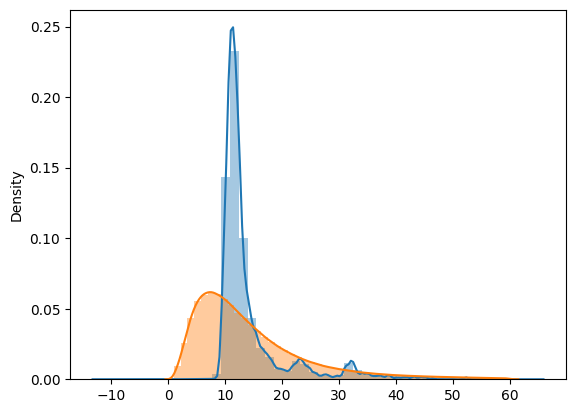

In [16]:
sns.distplot(y_pred, label="prediction")
sns.distplot(y_train_jan, label="actual")

In [17]:
root_mean_squared_error(y_train_jan, y_pred)

7.649261932106969

In [ ]:
# df_feb["duration"] = df_feb["tpep_dropoff_datetime"] - df_feb["tpep_pickup_datetime"]
# df_feb["duration"] = df_feb["duration"].apply(lambda x: x.total_seconds() / 60)

In [8]:
df_feb["duration"] = (df_feb["tpep_dropoff_datetime"] - df_feb["tpep_pickup_datetime"]).dt.total_seconds() / 60

In [18]:
df_feb = df_feb[(df_feb["duration"] >= 1) & (df_feb["duration"] <= 60)]

In [19]:
df_feb[categorical] = df_feb[categorical].astype('str')

In [20]:
train_feb_dicts = df_feb[categorical].to_dict(orient='records')

In [21]:
X_train_feb = dv.transform(train_feb_dicts)

In [22]:
y_train_feb = df_feb["duration"].values

In [23]:
y_pred_feb = lr.predict(X_train_feb)

In [24]:
root_mean_squared_error(y_train_feb, y_pred_feb)

7.811818743246608